In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle


In [3]:

dataset = pd.read_csv('diabetes.csv')

In [4]:

dataset




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:

dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:

dataset.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:

dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Correlation Heatmap: To check how features relate to each other.

Distribution Plots (KDE): To see how certain features like Pregnancies or Glucose differ for diabetic vs. non-diabetic patients.

Violin Plot: Glucose levels by outcome.



Text(0.5, 1.0, 'Correlation Heatmap')

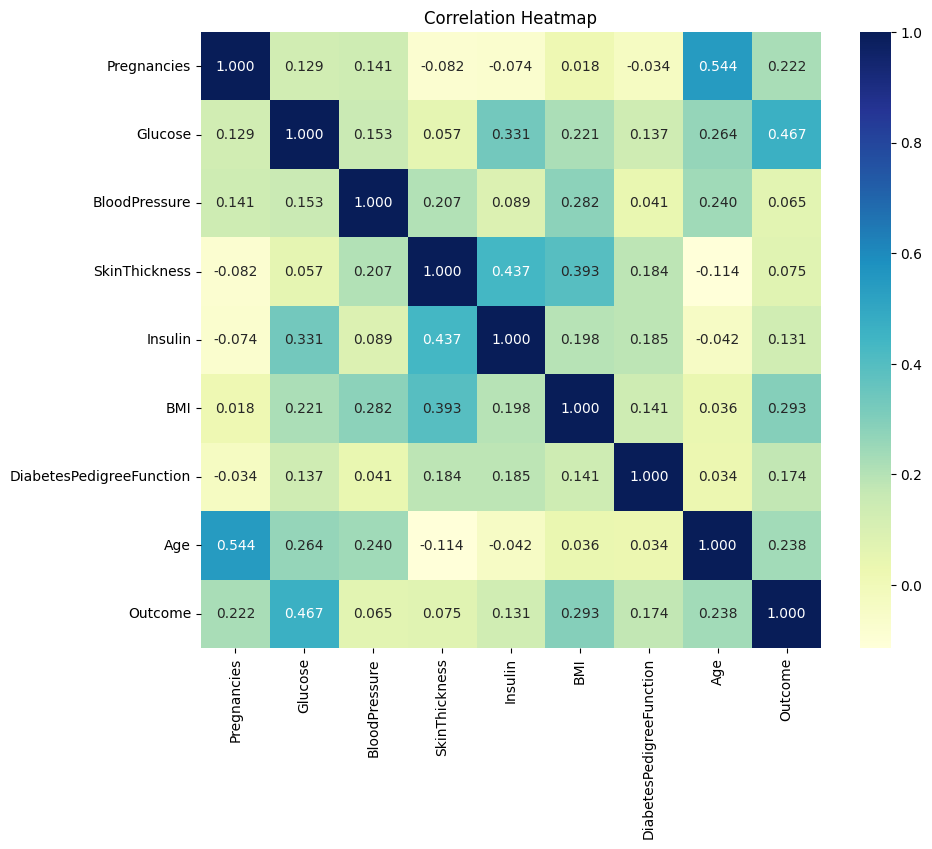

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True, fmt='.3f', cmap='YlGnBu')
plt.title("Correlation Heatmap")


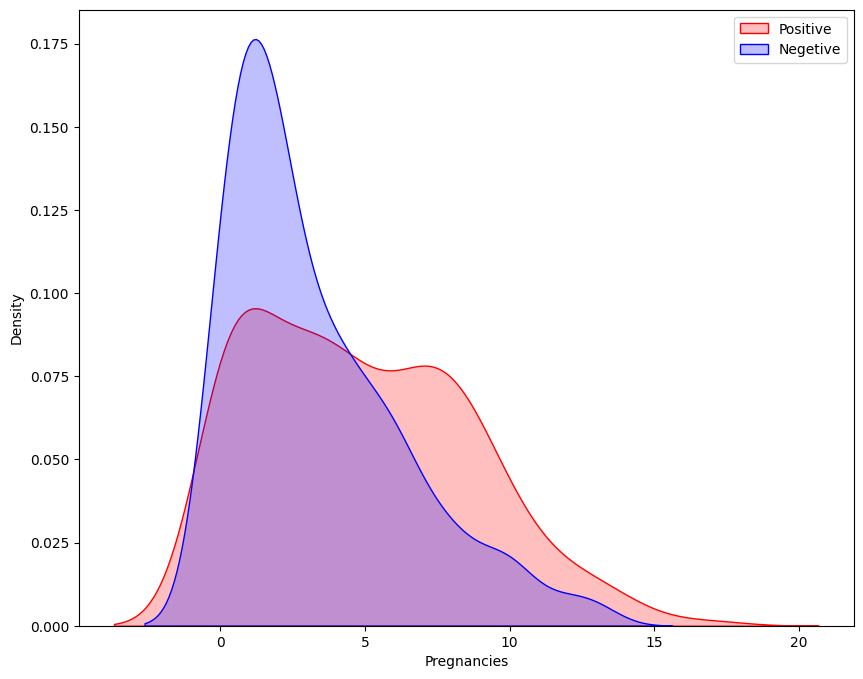

In [10]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==1], color='Red', fill = True)
kde=sns.kdeplot(dataset['Pregnancies'][dataset['Outcome']==0], color='Blue', fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negetive"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

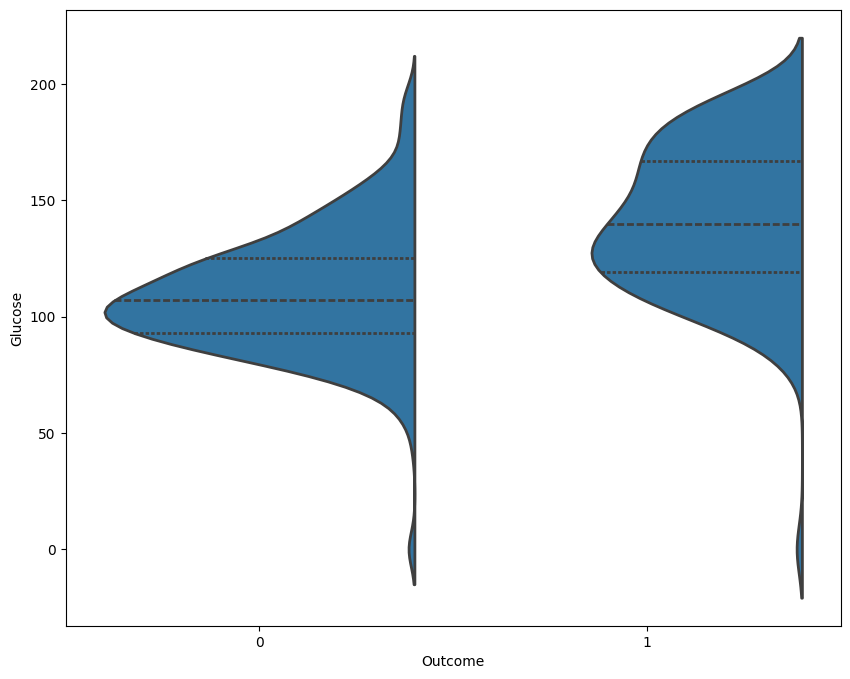

In [11]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset, x="Outcome", y="Glucose", split=True, linewidth=2, inner="quart")

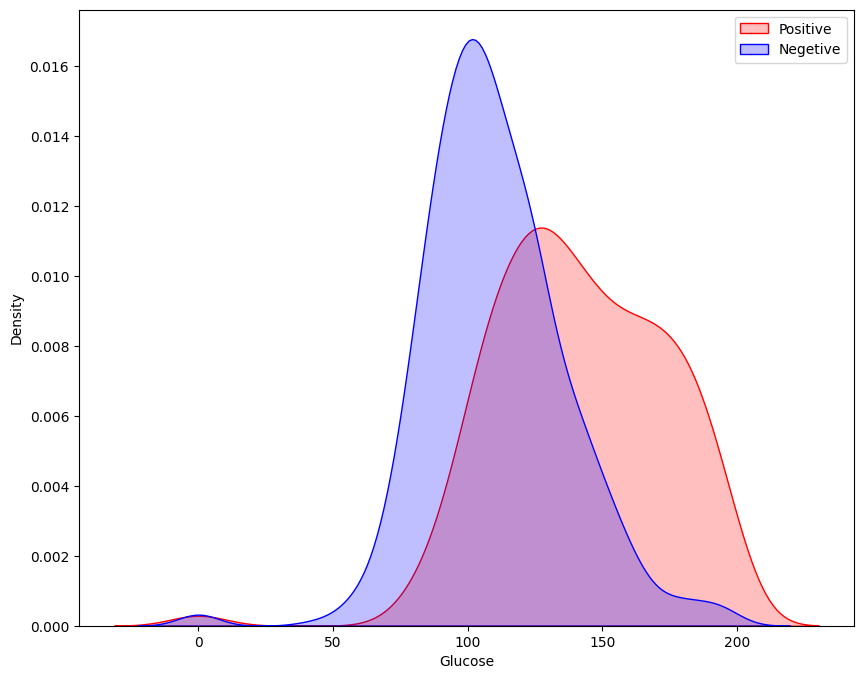

In [12]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset['Glucose'][dataset['Outcome']==1], color='Red', fill = True)
kde=sns.kdeplot(dataset['Glucose'][dataset['Outcome']==0], color='Blue', fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive", "Negetive"])

In [13]:
#Some columns (like Glucose, BloodPressure, etc.) had 0 as invalid values.
dataset["Glucose"] = dataset["Glucose"].replace(0, dataset["Glucose"].median())
dataset["BloodPressure"] = dataset["BloodPressure"].replace(0, dataset["BloodPressure"].median())
dataset["BMI"] = dataset["BMI"].replace(0, dataset["BMI"].mean())
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [14]:
X=dataset.drop(["Outcome"], axis=1)
y=dataset["Outcome"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=10)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
260,3,191,68,15.000000,130.000000,30.9,0.299,34
151,4,114,65,20.536458,79.799479,21.9,0.432,37
383,1,90,62,18.000000,59.000000,25.1,1.268,25
581,6,109,60,27.000000,79.799479,25.0,0.206,27
300,0,167,72,20.536458,79.799479,32.3,0.839,30
...,...,...,...,...,...,...,...,...
369,1,133,102,28.000000,140.000000,32.8,0.234,45
320,4,129,60,12.000000,231.000000,27.5,0.527,31
527,3,116,74,15.000000,105.000000,26.3,0.107,24
125,1,88,30,42.000000,99.000000,55.0,0.496,26


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
training_accuracy=[]
test_accuracy=[]
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test, y_test))

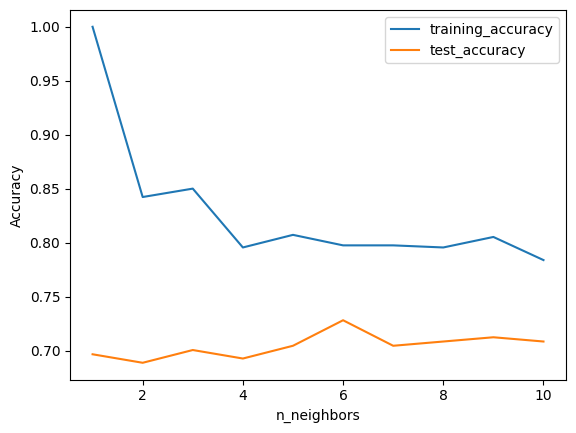

In [19]:

plt.plot(range(1,11), training_accuracy, label="training_accuracy")
plt.plot(range(1,11), test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
knn = KNeighborsClassifier(n_neighbors=9)    
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [21]:

print(knn.score(X_train,y_train), ": Training Accuracy")
print(knn.score(X_test, y_test), ": Test Accuracy")

0.8054474708171206 : Training Accuracy
0.7125984251968503 : Test Accuracy


In [22]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print(dt.score(X_train,y_train), ": Training Accuracy")
print(dt.score(X_test, y_test), ": Test Accuracy")

1.0 : Training Accuracy
0.7401574803149606 : Test Accuracy


In [23]:
dt1=DecisionTreeClassifier(random_state=0, max_depth=4)
dt1.fit(X_train, y_train)
print(dt1.score(X_train,y_train), ": Training Accuracy")
print(dt1.score(X_test, y_test), ": Test Accuracy")

0.8054474708171206 : Training Accuracy
0.7559055118110236 : Test Accuracy


# checking accuracy

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [25]:
y_pred = dt1.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7559055118110236

Confusion Matrix:
[[128  34]
 [ 28  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       162
           1       0.65      0.70      0.67        92

    accuracy                           0.76       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.76      0.76      0.76       254



In [31]:
import pickle

with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(dt1, f)



In [32]:
with open('diabetes_model.pkl', 'rb') as f:
    model = pickle.load(f)